**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Production economy and CO2 taxation](#toc1_)    
- 2. [Problem 2: Career choice model](#toc2_)    
- 3. [Problem 3: Barycentric interpolation](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
# Write your code here
import numpy as np
from types import SimpleNamespace
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

## 1. <a id='toc1_'></a>[Problem 1: Production economy and CO2 taxation](#toc0_)

Consider a production economy with two firms indexed by $j \in \{1,2\}$. Each produce its own good. They solve

$$
\begin{align*}
\max_{y_{j}}\pi_{j}&=p_{j}y_{j}-w_{j}\ell_{j}\\\text{s.t.}\;&y_{j}=A\ell_{j}^{\gamma}.
\end{align*}
$$

Optimal firm behavior is

$$
\begin{align*}
\ell_{j}^{\star}(w,p_{j})&=\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}} \\
y_{j}^{\star}(w,p_{j})&=A\left(\ell_{j}^{\star}(w,p_{j})\right)^{\gamma}
\end{align*}
$$

The implied profits are

$$
\pi_{j}^*(w,p_{j})=\frac{1-\gamma}{\gamma}w\cdot\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}}
$$

A single consumer supplies labor, and consumes the goods the firms produce. She also recieves the implied profits of the firm.<br>
She solves:

$$
\begin{align*}
U(p_1,p_2,w,\tau,T) = \max_{c_{1},c_{2},\ell} & \log(c_{1}^{\alpha}c_{2}^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} \\
\text{s.t.}\,\,\,&p_{1}c_{1}+(p_{2}+\tau)c_{2}=w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})
\end{align*}
$$

where $\tau$ is a tax and $T$ is lump-sum transfer. <br>
For a given $\ell$, it can be shown that optimal behavior is

$$
\begin{align*}
c_{1}(\ell)&=\alpha\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{1}} \\
c_{2}(\ell)&=(1-\alpha)\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{2}+\tau} \\
\end{align*}
$$
Such that optimal behavior is:
$$
\ell^* = \underset{\ell}{\arg\max} \log(\left(c_{1}(\ell)\right)^{\alpha}\cdot \left(c_{2}(\ell)\right)^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} 
$$
With optimal consumption:
$$
\begin{align*}
c_1^*=c_{1}(\ell^*) \\
c_2^*=c_{2}(\ell^*)\\
\end{align*}
$$


The government chooses $\tau$ and balances its budget so $T=\tau c_2^*$. We initially set $\tau,T=0$.

Market clearing requires:

1. Labor market: $\ell^* = \ell_1^* + \ell_2^*$
1. Good market 1: $c_1^* = y_1^*$
1. Good market 2: $c_2^* = y_2^*$


**Question 1:** Check market clearing conditions for $p_1$ in `linspace(0.1,2.0,10)` and $p_2$ in `linspace(0.1,2.0,10)`. We choose $w=1$ as numeraire.

In [2]:
par = SimpleNamespace()

# firms
par.A = 1.0
par.gamma = 0.5

# households
par.alpha = 0.3
par.nu = 1.0
par.epsilon = 2.0

# government
par.tau = 0.0
par.T = 0.0

# Question 3
par.kappa = 0.1

In [3]:
# write you answer here

**Question 2:** Find the equilibrium prices $p_1$ and $p_2$.<br>
*Hint: you can use Walras' law to only check 2 of the market clearings*

In [4]:
# write your answer here

Assume the government care about the social welfare function:

$$
SWF = U - \kappa y_2^*
$$

Here $\kappa$ measures the social cost of carbon emitted by the production of $y_2$ in equilibrium.

**Question 3:** What values of $\tau$ and (implied) $T$ should the government choose to maximize $SWF$?

In [5]:
# write your answer here

## 2. <a id='toc2_'></a>[Problem 2: Career choice model](#toc0_)

Consider a graduate $i$ making a choice between entering $J$ different career tracks. <br>
Entering career $j$ yields utility $u^k_{ij}$. This value is unknown to the graduate ex ante, but will ex post be: <br>
$$
    u_{i,j}^k = v_{j} + \epsilon_{i,j}^k
$$

They know that $\epsilon^k_{i,j}\sim \mathcal{N}(0,\sigma^2)$, but they do not observe $\epsilon^k_{i,j}$ before making their career choice. <br>

Consider the concrete case of $J=3$ with:
$$
\begin{align*}
    v_{1} &= 1 \\
    v_{2} &= 2 \\
    v_{3} &= 3
\end{align*}
$$

If the graduates know the values of $v_j$ and the distribution of $\epsilon_{i,j}^k$, they can calculate the expected utility of each career track using simulation: <br>
$$
    \mathbb{E}\left[ u^k_{i,j}\vert v_j \right] \approx v_j + \frac{1}{K}\sum_{k=1}^K \epsilon_{i,j}^k
$$

In [6]:
par = SimpleNamespace()
par.J = 3
par.N = 10
par.K = 10000

par.F = np.arange(1,par.N+1)
par.sigma = 2

par.v = np.array([1,2,3])
par.c = 1

**Question 1:** Simulate and calculate expected utility and the average realised utility for $K=10000$ draws, for each career choice $j$.


In [7]:
# write your answer here

# Seed for reproducibility
np.random.seed(2024)
eps = np.random.normal(0,par.sigma,(par.J, par.K)) # Draw epsilons for each of the J carrer paths

Eu = np.nan + np.zeros((par.J))
for j, jv in enumerate(par.v):
    Eu[j] = par.v[j] + np.mean(eps[j,:])

print(Eu)

[1.01539166 2.00637788 3.00296961]


Now consider a new scenario: Imagine that the graduate does not know $v_j$. The *only* prior information they have on the value of each job, comes from their $F_{i}$ friends that work in each career $j$. After talking with them, they know the average utility of their friends (which includes their friends' noise term), giving them the prior expecation: <br>
$$
\tilde{u}^k_{i,j}\left( F_{i}\right) = \frac{1}{F_{i}}\sum_{f=1}^{F_{i}} \left(v_{j} + \epsilon^k_{f,j}\right), \; \epsilon^k_{f,j}\sim \mathcal{N}(0,\sigma^2)
$$
For ease of notation consider that each graduate have $F_{i}=i$ friends in each career. <br>

For $K$ times do the following: <br>
1. For each person $i$ draw $J\cdot F_i$ values of $\epsilon_{f,j}^{k}$, and calculate the prior expected utility of each career track, $\tilde{u}^k_{i,j}\left( F_{i}\right)$. <br>
Also draw their own $J$ noise terms, $\epsilon_{i,j}^k$
1. Each person $i$ chooses the career track with the highest expected utility: $$j_i^{k*}= \arg\max_{j\in{1,2\dots,J}}\left\{ \tilde{u}^k_{i,j}\left( F_{i}\right)\right\} $$
1. Store the chosen careers: $j_i^{k*}$, the prior expectation of the value of their chosen career: $\tilde{u}^k_{i,j=j_i^{k*}}\left( F_{i}\right)$, and the realized value of their chosen career track: $u^k_{i,j=j_i^{k*}}=v_{j=j_i^{k*}}+\epsilon_{i,j=j_i^{k*}}^k$.

Chosen values will be: <br>
$i\in\left\{1,2\dots,N\right\}, N=10$ <br>
$F_i = i$<br>
So there are 10 graduates. The first has 1 friend in each career, the second has 2 friends, ... the tenth has 10 friends.

**Question 2:** Simulate and visualize: For each type of graduate, $i$, the share of graduates choosing each career, the average subjective expected utility of the graduates, and the average ex post realized utility given their choice. <br>
That is, calculate and visualize: <br>
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \mathbb{I}\left\{ j=j_i^{k*} \right\}  \;\forall j\in\left\{1,2,\dots,J\right\}
\end{align*}
$$
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \tilde{u}^k_{ij=j_i^{k*}}\left( F_{i}\right)
\end{align*}
$$
And 
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} u^k_{ij=j_i^{k*}} 
\end{align*}
$$
For each graduate $i$.

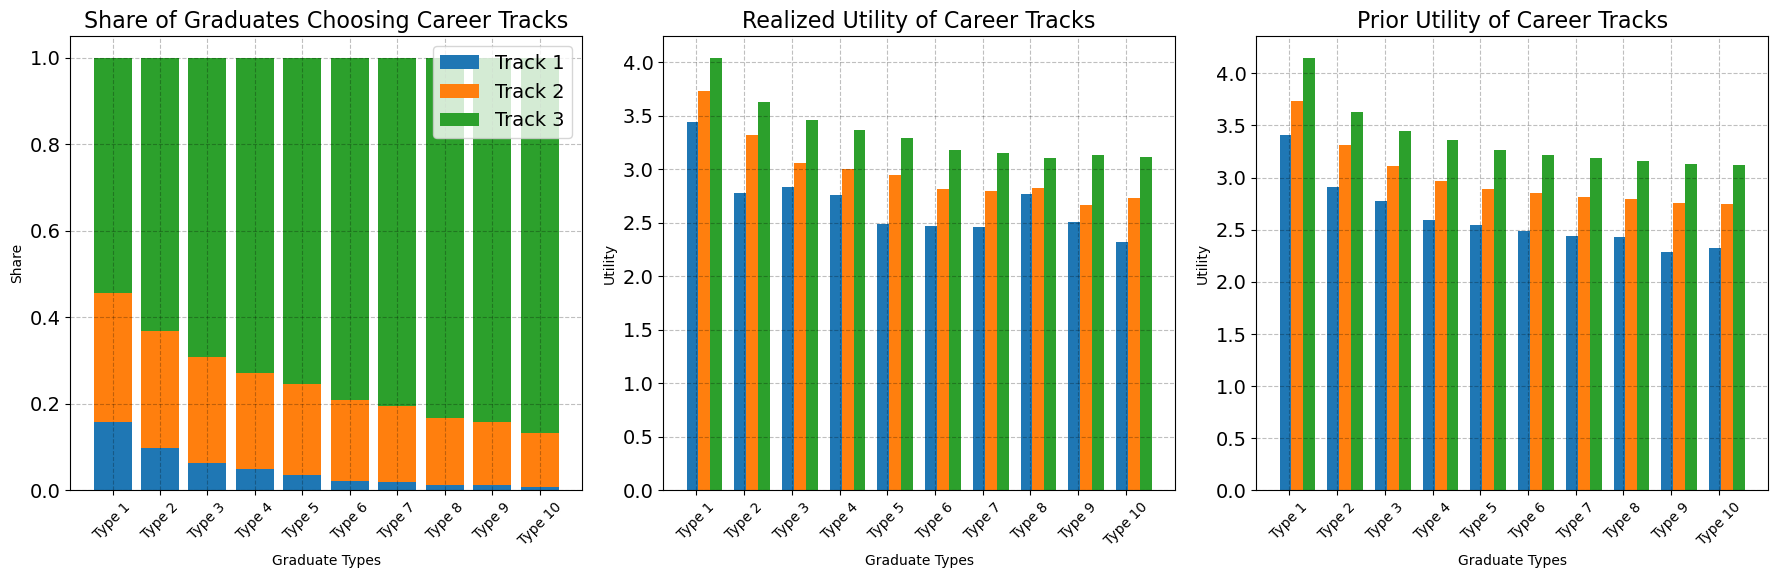

In [8]:
import problem2 

problem2.plot_p2(par)

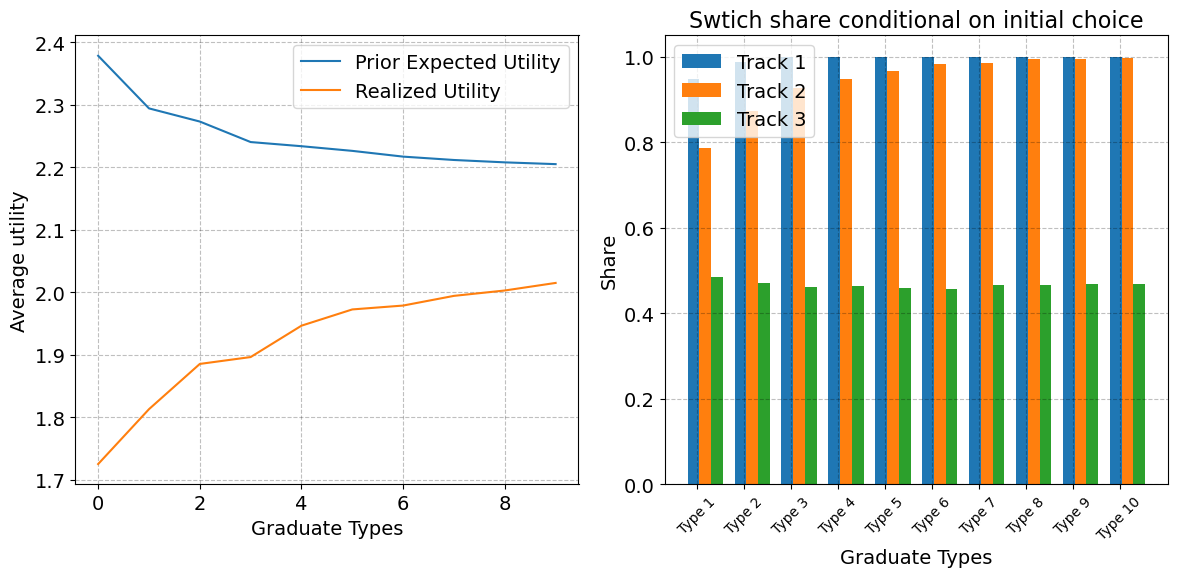

In [9]:
problem2.plot_p3(par)

In [10]:
# Write your answer here 
np.random.seed(2024)
# Allocate memory
def carrer_choice(par):
    u_ij_prior = np.nan + np.zeros((par.N))
    u_ij_real = np.nan + np.zeros((par.N))
    u_ijF = np.nan + np.zeros((par.J))
    j_star = np.nan + np.zeros((par.N))

    for i in range(par.N):
        eps_fj = np.random.normal(0,par.sigma,(par.J, i+1))
        eps_ij = np.random.normal(0,par.sigma,(par.J))

        for j, jv in enumerate(par.v):
            u_ijF[j] = par.v[j] + np.mean(eps_fj[j,:])
        j_star[i] = np.argmax(u_ijF)
        j_star_temp  = np.argmax(u_ijF)
        u_ij_prior[i] = u_ijF[j_star_temp] # Prior expectation of the utility
        u_ij_real[i] = u_ijF[j_star_temp] + eps_ij[j_star_temp] # Realization of the utility
    return u_ij_prior, u_ij_real, j_star

u_ij_prior, u_ij_real, j_star = carrer_choice(par)

In [11]:
u_ij_prior_avg = np.zeros((par.N,par.K))
u_ij_real_avg = np.zeros((par.N,par.K))
j_star_avg = np.zeros((par.N,par.K))

for k in range(par.K):
    u_ij_prior, u_ij_real, j_star = carrer_choice(par)
    u_ij_prior_avg[:,k] = u_ij_prior
    u_ij_real_avg[:,k] = u_ij_real
    j_star_avg[:,k] = j_star

In [12]:
shares = np.zeros((par.N,par.J))
for i in range(par.N):
    for j in range(par.J):
        shares[i,j] = np.sum(j_star_avg[i,:] == j)/par.K

u_ij_prior_plot = np.mean(u_ij_prior_avg, axis = 1)
u_ij_real_plot = np.mean(u_ij_real_avg, axis = 1)


In [13]:
# Example of applying a mask to calculate conditional expected utilities
conditional_u_ij_real_avg = np.zeros((par.N, par.J))
conditional_u_ij_prior_avg = np.zeros((par.N, par.J))

for i in range(par.N):
    for j in range(par.J):
        # Create a mask for when the career choice j is selected
        mask = j_star_avg[i,:] == j
        # Apply the mask to u_ij_real_avg and calculate the mean for the selected career choice
        conditional_u_ij_real_avg[i,j] = np.mean(u_ij_real_avg[i, mask])
        conditional_u_ij_prior_avg[i,j] = np.mean(u_ij_prior_avg[i, mask])

**NOTE**: The ploting below has been written primarily with the help of Github Copilot.

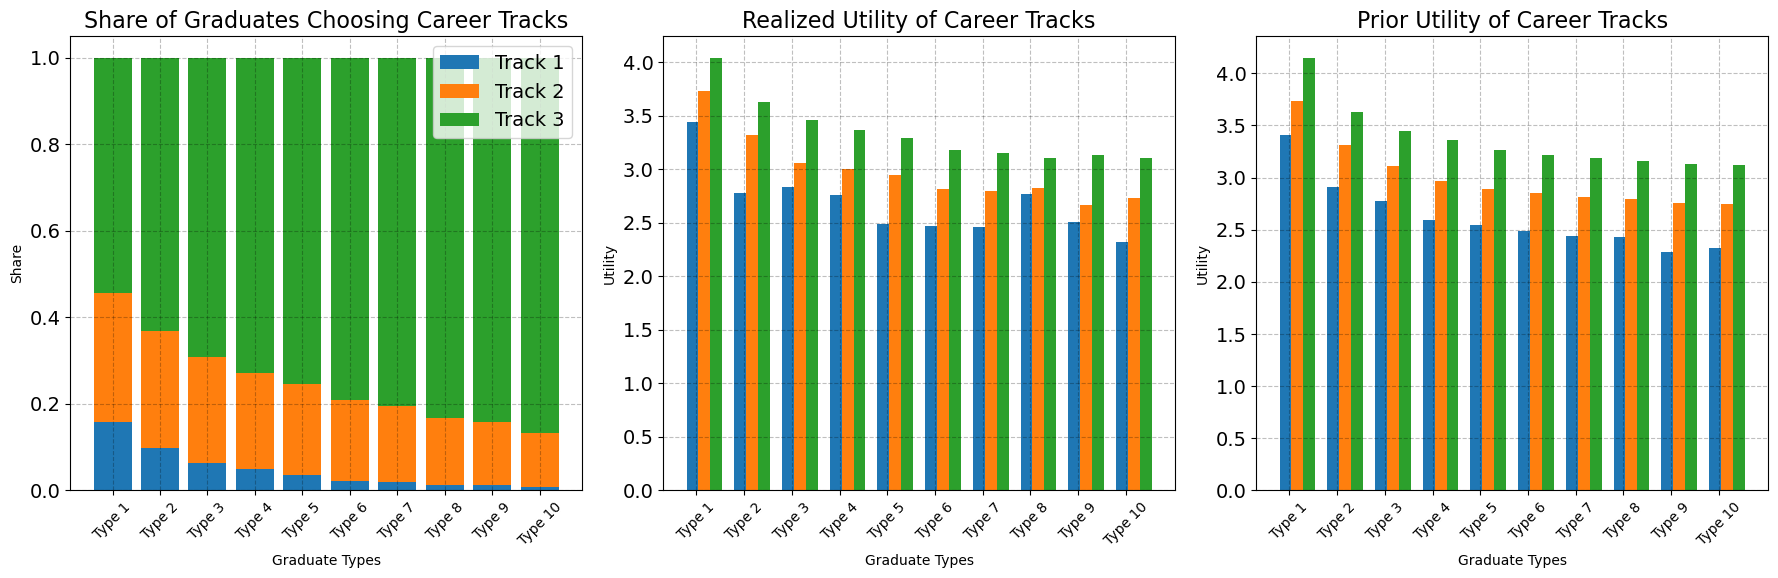

In [14]:
# Assuming 'shares' is your array from the previous step
# And assuming 'par.N' is the number of graduate types and 'par.J' is the number of career tracks

# Set the labels for each type of graduate and career tracks for legend
graduate_types = [f'Type {i+1}' for i in range(par.N)]
career_tracks = [f'Track {j+1}' for j in range(par.J)]

# Set up the figure and axes for the bar chart
# fig, ax = plt.subplots(figsize=(10, 6))
fig = plt.figure(figsize=(18,6))

ax = fig.add_subplot(1,3,1)

# Positions of the bars on the x-axis
indices = np.arange(par.N)

# Initialize an array to keep track of the bottom position for each stack
bottoms = np.zeros(par.N)

for j in range(par.J):
    # Plotting each career track as a stacked bar
    ax.bar(indices, shares[:, j], bottom=bottoms, label=career_tracks[j])
    # Update the bottoms for the next stack
    bottoms += shares[:, j]

# Adding labels and title
ax.set_xlabel('Graduate Types', fontsize=10)
ax.set_ylabel('Share', fontsize=10)
ax.set_title('Share of Graduates Choosing Career Tracks', fontsize=16)

# Customizing tick labels to show graduate types
ax.set_xticks(indices)
ax.set_xticklabels(graduate_types, fontsize=10, rotation=45)

# Adding legend
ax.legend()

ax2 = fig.add_subplot(1,3,2)

# Adding labels and title
ax2.set_xlabel('Graduate Types', fontsize=10)
bar_width = 0.25
for j in range(par.J):
    # Plotting each career track
    ax2.bar(indices + j*bar_width, conditional_u_ij_real_avg[:, j], width=bar_width, label=career_tracks[j])

# Adding labels and title
ax2.set_xlabel('Graduate Types', fontsize=10)
ax2.set_ylabel('Share', fontsize=14)
ax2.set_ylabel('Utility', fontsize=10)
ax2.set_title('Realized Utility of Career Tracks', fontsize=16)

# Adding ticks and customizing tick labels to show graduate types
ax2.set_xticks(indices + bar_width / par.J)
ax2.set_xticklabels(graduate_types, fontsize=10, rotation=45)

ax3 = fig.add_subplot(1,3,3)

# Adding labels and title
ax3.set_xlabel('Graduate Types', fontsize=10)
bar_width = 0.25
for j in range(par.J):
    # Plotting each career track
    ax3.bar(indices + j*bar_width, conditional_u_ij_prior_avg[:, j], width=bar_width, label=career_tracks[j])

# Adding labels and title
ax3.set_xlabel('Graduate Types', fontsize=10)
ax3.set_ylabel('Share', fontsize=14)
ax3.set_ylabel('Utility', fontsize=10)
ax3.set_title('Prior Utility of Career Tracks', fontsize=16)

# Adding ticks and customizing tick labels to show graduate types
ax3.set_xticks(indices + bar_width / par.J)
ax3.set_xticklabels(graduate_types, fontsize=10, rotation=45)

# Show plot
plt.tight_layout()
plt.show()

After a year of working in their career, the graduates learn $u^k_{ij}$ for their chosen job $j_i^{k*}$ perfectly. <br>
The can switch to one of the two remaining careers, for which they have the same prior as before, but it will now include a switching cost of $c$ which is known.
Their new priors can be written as: 
$$
\tilde{u}^{k,2}_{ij}\left( F_{i}\right) = \begin{cases}
            \tilde{u}^k_{ij}\left( F_{i}\right)-c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

We will set $c=1$.

Their realized utility will be: <br>
$$
u^{k,2}_{ij}= \begin{cases}
            u_{ij}^k -c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

**Question 3:** Following the same approach as in question 2, find the new optimal career choice for each $i$, $k$. Then for each $i$, calculate the average subjective expected utility from their new optimal career choice, and the ex post realized utility of that career. Also, for each $i$, calculate the share of graduates that chooses to switch careers, conditional on which career they chose in the first year. <br>

In [15]:
# Write your answer here 
np.random.seed(2024)
# Allocate memory
def carrer_choice_y2(par):
    u_ij_prior = np.nan + np.zeros((par.N))
    u_ij_prior_switch = np.nan + np.zeros((par.N))
    u_ij_real = np.nan + np.zeros((par.N))
    u_ij_real_switch = np.nan + np.zeros((par.N))
    u_ijF = np.nan + np.zeros((par.J))
    u_ijF_swtich = np.nan + np.zeros((par.J))
    j_star = np.nan + np.zeros((par.N))
    j_star_switch = np.nan + np.zeros((par.N))

    for i in range(par.N):
        eps_fj = np.random.normal(0,par.sigma,(par.J, i+1))
        eps_ij = np.random.normal(0,par.sigma,(par.J))

        # Calculate the expected utility for each career path
        for j, jv in enumerate(par.v):
            u_ijF[j] = par.v[j] + np.mean(eps_fj[j,:])
        
        # Find the career path that maximizes the expected utility
        j_star[i] = np.argmax(u_ijF)
        j_star_temp  = np.argmax(u_ijF)

        # Update the expected utility for each career path when the switching cost is applied
        for j, jv in enumerate(par.v):
            if j == j_star_temp:
                u_ijF_swtich[j] = par.v[j] - par.c
            else:
                u_ijF_swtich[j] = u_ijF[j]

        # Find the career path that maximizes the expected utility
        j_star_switch[i] = np.argmax(u_ijF_swtich)
        j_star_temp_switch  = np.argmax(u_ijF_swtich)

        # Find the career path that maximizes the expected utility with the switching cost
        u_ij_prior_switch[i] = u_ijF_swtich[j_star_temp_switch] # Prior expectation of the utility

        if j_star_temp_switch == j_star_temp:
            u_ij_real_switch[i] = par.v[j_star_temp_switch] # Realization of the utility
        else:
            u_ij_real_switch[i] = par.v[j_star_temp_switch] - par.c
            
    return u_ij_prior_switch, u_ij_real_switch, j_star_switch

u_ij_prior, u_ij_real, j_star = carrer_choice_y2(par)

In [16]:
u_ij_prior_avg_y2 = np.zeros((par.N,par.K))
u_ij_real_avg_y2 = np.zeros((par.N,par.K))
j_star_avg_y2 = np.zeros((par.N,par.K))

for k in range(par.K):
    u_ij_prior, u_ij_real, j_star = carrer_choice_y2(par)
    u_ij_prior_avg_y2[:,k] = u_ij_prior
    u_ij_real_avg_y2[:,k] = u_ij_real
    j_star_avg_y2[:,k] = j_star

u_ij_prior_avg_y2_mean = np.mean(u_ij_prior_avg_y2, axis = 1) # Prior expected utility after switching
u_ij_real_avg_y2_mean = np.mean(u_ij_real_avg_y2, axis = 1) # Realized utility after switching

In [17]:
print(u_ij_prior_avg_y2_mean)
print(u_ij_real_avg_y2_mean)

[2.37842002 2.29439947 2.27339864 2.24053284 2.23379005 2.22643088
 2.21721603 2.21177481 2.20797848 2.20515029]
[1.7252 1.8132 1.8855 1.8962 1.9464 1.9726 1.979  1.9943 2.0029 2.0153]


In [18]:
difference_matrix = np.where(j_star_avg_y2 != j_star_avg, 1, 0)

# Example of applying a mask to calculate conditional expected utilities
conditional_switch_share = np.zeros((par.N, par.J))

for i in range(par.N):
    for j in range(par.J):
        # Create a mask for when the career choice j is selected
        mask = j_star_avg[i,:] == j
        # Apply the mask to u_ij_real_avg and calculate the mean for the selected career choice
        conditional_switch_share[i,j] = np.mean(difference_matrix[i, mask])

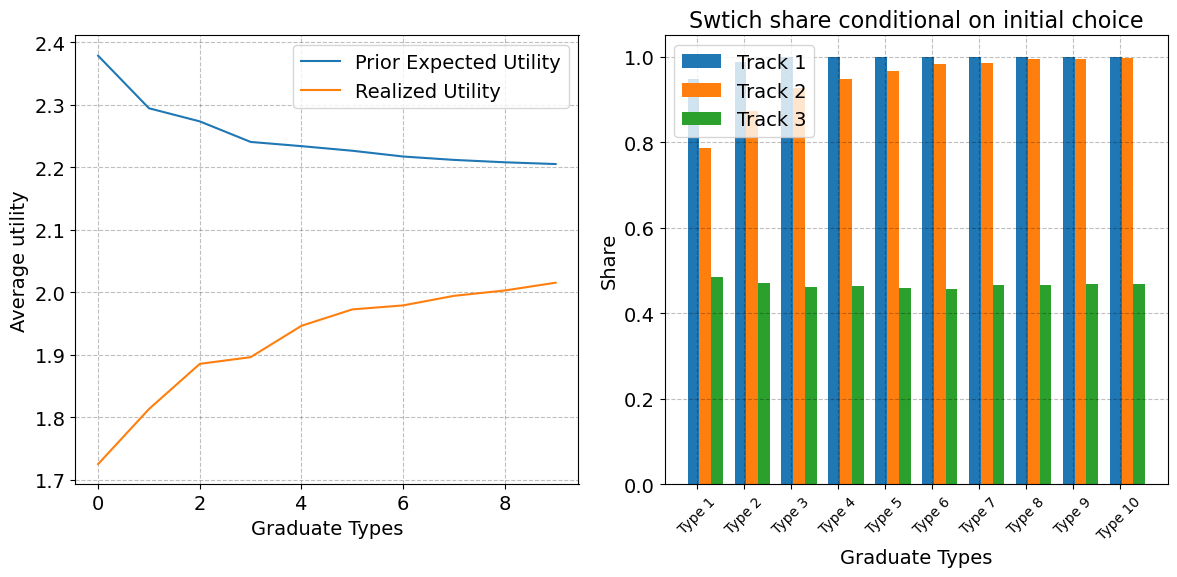

In [19]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,2,1)
ax.plot(u_ij_prior_avg_y2_mean, label='Prior Expected Utility')
ax.plot(u_ij_real_avg_y2_mean, label='Realized Utility')
ax.legend()
ax.set_xlabel('Graduate Types', fontsize=14)
ax.set_ylabel('Average utility', fontsize=14)

ax3 = fig.add_subplot(1,2,2)

# Adding labels and title
ax3.set_xlabel('Graduate Types', fontsize=14)
bar_width = 0.25
for j in range(par.J):
    # Plotting each career track
    ax3.bar(indices + j*bar_width, conditional_switch_share[:, j], width=bar_width, label=career_tracks[j])

# Adding labels and title
ax3.set_xlabel('Graduate Types', fontsize=14)
ax3.set_ylabel('Share', fontsize=14)
ax3.set_title('Swtich share conditional on initial choice', fontsize=16)

# Adding ticks and customizing tick labels to show graduate types
ax3.set_xticks(indices + bar_width / par.J)
ax3.set_xticklabels(graduate_types, fontsize=10, rotation=45)
ax3.legend()
# Show plot
plt.tight_layout()
plt.show()

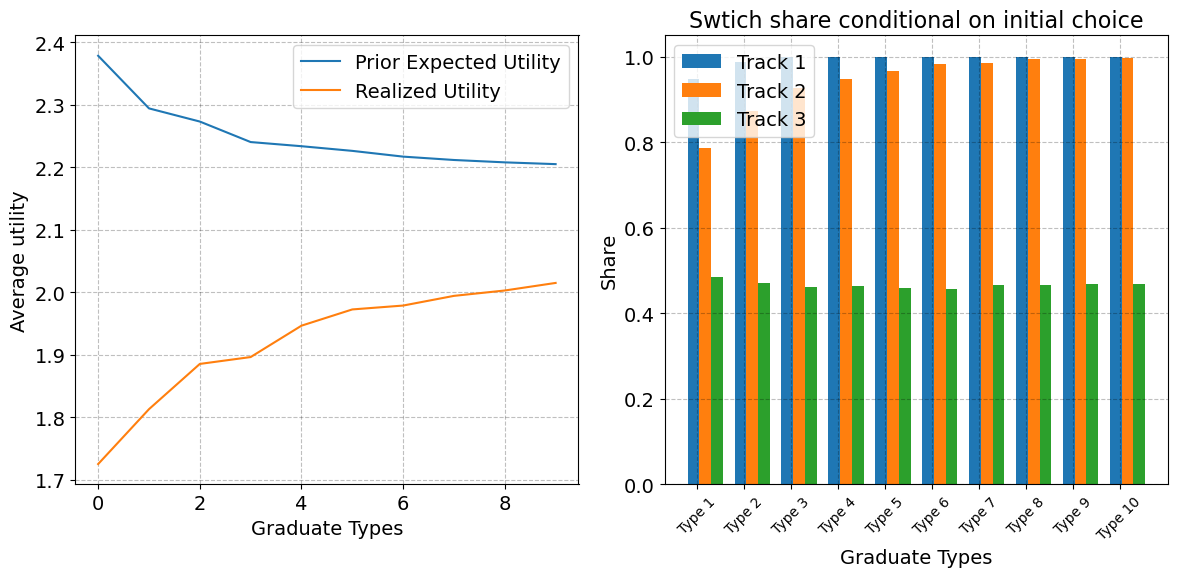

In [20]:
problem2.plot_p3(par)

## 3. <a id='toc3_'></a>[Problem 3: Barycentric interpolation](#toc0_)

**Problem:** We have a set of random points in the unit square,

$$
\mathcal{X} = \{(x_1,x_2)\,|\,x_1\sim\mathcal{U}(0,1),x_2\sim\mathcal{U}(0,1)\}.
$$

For these points, we know the value of some function $f(x_1,x_2)$,

$$
\mathcal{F} = \{f(x_1,x_2) \,|\, (x_1,x_2) \in \mathcal{X}\}.
$$

Now we want to approximate the value $f(y_1,y_2)$ for some  $y=(y_1,y_2)$, where $y_1\sim\mathcal{U}(0,1)$ and $y_2\sim\mathcal{U}(0,1)$.

**Building block I**

For an arbitrary triangle $ABC$ and a point $y$, define the so-called barycentric coordinates as:

$$
\begin{align*}
  r^{ABC}_1 &= \frac{(B_2-C_2)(y_1-C_1) + (C_1-B_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_2 &= \frac{(C_2-A_2)(y_1-C_1) + (A_1-C_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_3 &= 1 - r_1 - r_2.
\end{align*}
$$

If $r^{ABC}_1 \in [0,1]$, $r^{ABC}_2 \in [0,1]$, and $r^{ABC}_3 \in [0,1]$, then the point is inside the triangle.

We always have $y = r^{ABC}_1 A + r^{ABC}_2 B + r^{ABC}_3 C$.

**Building block II**

Define the following points:

$$
\begin{align*}
A&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}>y_{2}\\
B&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}<y_{2}\\
C&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}<y_{2}\\
D&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}>y_{2}.
\end{align*}
$$

**Algorithm:**

1. Compute $A$, $B$, $C$, and $D$. If not possible return `NaN`.
1. If $y$ is inside the triangle $ABC$ return $r^{ABC}_1 f(A) + r^{ABC}_2 f(B) + r^{ABC}_3 f(C)$.
1. If $y$ is inside the triangle $CDA$ return $r^{CDA}_1 f(C) + r^{CDA}_2 f(D) + r^{CDA}_3 f(A)$.
1. Return `NaN`.



**Sample:**

In [21]:
rng = np.random.default_rng(2024)

X = rng.uniform(size=(50,2))
y = rng.uniform(size=(2,))

**Questions 1:** Find $A$, $B$, $C$ and $D$. Illustrate these together with $X$, $y$ and the triangles $ABC$ and $CDA$.

In [22]:
# write your answer here
def objective_function(x1,x2,y1,y2):
    return np.sqrt((x1 - y1)**2 + (x2 - y2)**2)

def compute_coefficients(X, y1, y2, coeff_type):
    """Compute the coefficients for barycentric coordinates for the given type of coefficient"""
    coeff = np.inf
    arg_min = None
    for x1, x2 in X:
        if coeff_type == 'A':
            cond = x1 > y1 and x2 > y2
        elif coeff_type == 'B':
            cond = x1 > y1 and x2 < y2
        elif coeff_type == 'C':
            cond = x1 < y1 and x2 < y2
        elif coeff_type == 'D':
            cond = x1 < y1 and x2 > y2
        if cond:
            coeff_temp = objective_function(x1,x2,y1,y2)
            if coeff_temp < coeff:
                coeff = coeff_temp
                arg_min = (x1,x2)
    coeff = np.nan if coeff == np.inf else coeff
    arg_min = (np.nan, np.nan) if arg_min is None else arg_min
    return arg_min, coeff

coeff_list = ['A', 'B', 'C', 'D']
coeff_cords = []

for i, coeff_type in enumerate(coeff_list):
    arg_min, temp = compute_coefficients(X, y[0], y[1], coeff_type)
    coeff_cords.append(arg_min)

print(coeff_cords)
A = coeff_cords[0]
B = coeff_cords[1]
C = coeff_cords[2]
D = coeff_cords[3]

[(0.2607160525371862, 0.4363584511892198), (0.21315734573396772, 0.27424500425528053), (0.10056103098593427, 0.2795177487202619), (0.20634391138553032, 0.4427255670928353)]


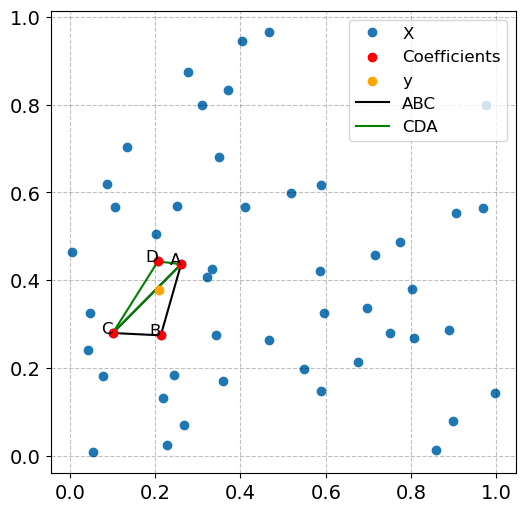

In [23]:
fig = plt.figure(figsize=(6,6))

ax = fig.add_subplot(1,1,1)

# Extract x and y coordinates
x_coords = [coord[0] for coord in coeff_cords]
y_coords = [coord[1] for coord in coeff_cords]

ax.plot(X[:,0], X[:,1], 'o', label='X', zorder = 1)
ax.scatter(x_coords, y_coords, color='red', label='Coefficients', zorder = 2)
ax.scatter(y[0], y[1], color='orange', label='y', zorder = 2)

# Plotting ABC triangle
ax.plot([A[0], B[0]], [A[1], B[1]], 'k-', zorder = 1)  # Line from A to B
ax.plot([B[0], C[0]], [B[1], C[1]], 'k-', zorder = 1)  # Line from B to C
ax.plot([C[0], A[0]], [C[1], A[1]], 'k-', zorder = 1, label = 'ABC')  # Line from C to A

# Plotting CDA triangle
ax.plot([C[0], D[0]], [C[1], D[1]], 'g-', zorder = 1)  # Line from C to D
ax.plot([D[0], A[0]], [D[1], A[1]], 'g-', zorder = 1)  # Line from D to A
ax.plot([C[0], A[0]], [C[1], A[1]], 'g-', zorder = 1, label = 'CDA')  # Line from C to A

# Annotating the vertices
ax.text(A[0], A[1], 'A', fontsize=12, ha='right')
ax.text(B[0], B[1], 'B', fontsize=12, ha='right')
ax.text(C[0], C[1], 'C', fontsize=12, ha='right')
ax.text(D[0], D[1], 'D', fontsize=12, ha='right')
ax.legend(fontsize=12)

**Question 2:** Compute the barycentric coordinates of the point $y$ with respect to the triangles $ABC$ and $CDA$. Which triangle is $y$ located inside?

In [24]:
def barycentric_cord(A,B,C,y):
    """Computes the  barycentric coordinates of a point y with respect to triangle ABC."""
    r1 = ((B[1] - C[1])*(y[0] - C[0]) + (C[0] - B[0])*(y[1] - C[1])) / ((B[1] - C[1])*(A[0] - C[0]) + (C[0] - B[0])*(A[1] - C[1]))
    r2 = ((C[1] - A[1])*(y[0] - C[0]) + (A[0] - C[0])*(y[1] - C[1])) / ((B[1] - C[1])*(A[0] - C[0]) + (C[0] - B[0])*(A[1] - C[1]))
    r3 = 1 - r1 - r2

    is_inside = (0 <= r1 <= 1) and (0 <= r2 <= 1) and (0 <= r3 <= 1)
    return r1, r2, r3, is_inside

r1_ABC, r2_ABC, r3_ABC, is_inside_ABC = barycentric_cord(A,B,C,y)
r1_CDA, r2_CDA, r3_CDA, is_inside_CDA = barycentric_cord(C,D,A,y)
print(f"r1_ABC = {r1_ABC}, r2_ABC = {r2_ABC}, r3_ABC = {r3_ABC}, y is inside: {is_inside_ABC}")
print(f"r1_CDA = {r1_CDA}, r2_CDA = {r2_CDA}, r3_CDA = {r3_CDA}, y is inside: {is_inside_CDA}")

r1_ABC = 0.6286263152916166, r2_ABC = 0.06910145494351515, r3_ABC = 0.3022722297648682, y is inside: True
r1_CDA = 0.3682598757102867, r2_CDA = -0.13392661883334067, r3_CDA = 0.765666743123054, y is inside: False


From the above, it can be seen that the point y is inside the triange ABC, but not inside the triangle CDA.

Now consider the function:
$$
f(x_1,x_2) = x_1 \cdot x_2
$$

In [25]:
f = lambda x: x[0]*x[1]
F = np.array([f(x) for x in X])

**Question 3:** Compute the approximation of $f(y)$ using the full algorithm. Compare with the true value.

In [26]:
# write your answer here
def barycentric_approx(X, y, f):
    """Full implementation of the barycentric approximation."""
    coeff_list = ['A', 'B', 'C', 'D']
    coeff_cords = []

    for i, coeff_type in enumerate(coeff_list):
        arg_min, _ = compute_coefficients(X, y[0], y[1], coeff_type)
        coeff_cords.append(arg_min)

    A = coeff_cords[0]
    B = coeff_cords[1]
    C = coeff_cords[2]
    D = coeff_cords[3]
    #print(coeff_cords)
    r1_ABC, r2_ABC, r3_ABC, is_inside_ABC = barycentric_cord(A,B,C,y)
    r1_CDA, r2_CDA, r3_CDA, is_inside_CDA = barycentric_cord(C,D,A,y)

    if is_inside_ABC:
        approx_func = r1_ABC*f(y) + r2_ABC*f(y) + r3_ABC*f(y)
    elif is_inside_CDA:
        approx_func = r1_CDA*f(y) + r2_CDA*f(y) + r3_CDA*f(y)
    else:
        approx_func = np.nan

    print(f"Approimation of f(y) at y = {y}")
    print(f"Approximation of f(y) = {approx_func}")
    print(f"Actual value of f(y) = {f(y)}")
    print(f"Approximation error = {np.abs(approx_func - f(y))}")
    # return approx_func

barycentric_approx(X, y, f)
# approx_func_bary = barycentric_approx(X, y, f)
# print(f"Approximation of f(y) = {approx_func_bary}")
# print(f"Actual value of f(y) = {f(y)}")

Approimation of f(y) at y = [0.20901926 0.37774759]
Approximation of f(y) = 0.0789565216259594
Actual value of f(y) = 0.0789565216259594
Approximation error = 0.0


**Question 4:** Repeat question 3 for all points in the set $Y$.

In [27]:
Y = [(0.2,0.2),(0.8,0.2),(0.8,0.8),(0.8,0.2),(0.5,0.5)]

In [28]:
for y_loop in Y:
    barycentric_approx(X, y_loop, f)

Approimation of f(y) at y = (0.2, 0.2)
Approximation of f(y) = 0.04000000000000001
Actual value of f(y) = 0.04000000000000001
Approximation error = 0.0
Approimation of f(y) at y = (0.8, 0.2)
Approximation of f(y) = 0.16000000000000003
Actual value of f(y) = 0.16000000000000003
Approximation error = 0.0
Approimation of f(y) at y = (0.8, 0.8)
Approximation of f(y) = nan
Actual value of f(y) = 0.6400000000000001
Approximation error = nan
Approimation of f(y) at y = (0.8, 0.2)
Approximation of f(y) = 0.16000000000000003
Actual value of f(y) = 0.16000000000000003
Approximation error = 0.0
Approimation of f(y) at y = (0.5, 0.5)
Approximation of f(y) = 0.25
Actual value of f(y) = 0.25
Approximation error = 0.0


For the point (0.8,0.8) the function becomes NaN, and thus the approximation is not possible.